# Suppression electrode FWHM comparison


## Particle positions at surface of target


- current chamber
- microwave extraction aperture (1 mm diameter)
- surface mesh
- 5000 particles

- COMSOL files 06.suppr_electrode

- last accessed: 2019-02-14

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib import pyplot, transforms

pd.set_option("display.max_columns", 300)

### Specify path to datafile

In [3]:
file_FWHMs = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/02.current_chamber/06.suppr_electrode/particleData/plots/2D_histograms_lastTimestep/df_FWHMs.csv'
fig_savepath = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/02.current_chamber/06.suppr_electrode/particleData/plots/2D_histograms_lastTimestep/'

### Import and process the FWHMS

In [22]:
df = pd.read_csv(file_FWHMs, index_col=0)
df = df.drop(['id'], axis='columns')

df['ID'] = df['runfile'].str.extract(r'\.(\d\d\d)\.particleData')
df.set_index('ID', inplace=True)

df['FWHM_y'] = np.abs(df['FWHM_y'])
df['FWHM_x'] = np.abs(df['FWHM_x'])
df = df.sort_inde()

print(df_head())


AttributeError: 'DataFrame' object has no attribute 'sort'

### Plot

NameError: name 'sweep_info' is not defined

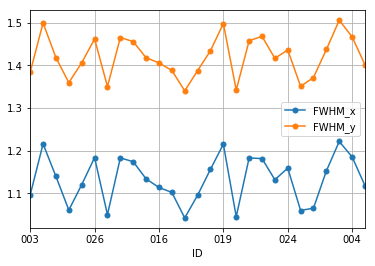

In [20]:
_ = df.plot(kind='line', style='.-', y=['FWHM_x', 'FWHM_y'], ms=10)
# _ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.grid()
_ = plt.xlabel(sweep_info)
_ = plt.ylabel(y_label)
_ = plt.title(fig_title)


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/comparison_FWHM'

# plt.savefig(filename + '.png', dpi=600)
plt.show()